# Proyecto Sprint 9
Showz, una empresa de venta de entradas de eventos quiere optimizar  los gastos de marketing.

**Se cuenta con:**


1.   Registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018 (visitas).
2.   Un archivo con los pedidos en este periodo (orders).
3.   Estadísticas de gastos de marketing (costos).

**Lo que se quiere saber:**



1.   cómo los clientes usan el servicio.
2.   cuándo empiezan a comprar.
3.   cuánto dinero aporta cada cliente a la compañía.
4.   cuándo los ingresos cubren el costo de adquisición de los clientes

(Se incluirán varias cajas de código y texto para darle un orden al desarrollo del ejercicio).

## Preparación datos y espacio de trabajo

In [ ]:
#Primer paso: importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statistics
import math as mt
pd.options.display.max_columns = None

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto.

In [ ]:
#llamar archivos
visitas = pd.read_csv('/content/visits_log_us.csv')
orders = pd.read_csv('/content/orders_log_us.csv')
costs= pd.read_csv('/content/costs_us.csv')

In [ ]:
#muestra visitas
print(visitas.head())
print(visitas.info())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage

El diccionario de datos proporcionado indica que:

"La tabla visits (registros del servidor con datos sobre las visitas al sitio web):

Uid: identificador único del usuario.

Device: dispositivo del usuario.

Start Ts: fecha y hora de inicio de la sesión.

End Ts: fecha y hora de término de la sesión.

Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD".

Se encuentra que la tabla no posee valores nulos, los datos coinciden con la descripción de la tabla. Los nombres de las columnas están en un formato que no es apropiado, igualmente las columnas de las fechas están en formato de string. En la siguiente celda serán los cambios de formato adecuados para el trabajo a realizar en este proyecto. Además, aunque no es un aspecto relevante, el orden de las columnas no coincide con el del diccionario de datos, lo importante es que están completas y corresponden a los valores que deben tener.

In [ ]:
#cambio de formato nombre  de columnas (todo en minúsculas, reemplazar espacios por guion bajo'_')
visits_new_col_names=[]
for old_name in visitas.columns:
  name_lowered = old_name.lower()
  name_no_spaces= name_lowered.replace(' ','_')
  visits_new_col_names.append(name_no_spaces)

visitas.columns = visits_new_col_names

#generar formato fechas
visitas['start_ts']=pd.to_datetime(visitas['start_ts'])
visitas['end_ts']=pd.to_datetime(visitas['end_ts'])
print(visitas.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


In [ ]:
#muestra orders
print(orders.head())
print(orders.info())

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


El diccionario de datos proporcionado indica que:

"La tabla orders (datos sobre pedidos):

Uid: identificador único del usuario que realiza un pedido.

Buy Ts: fecha y hora del pedido.

Revenue: el ingreso de Showz por el pedido".

Nuevamente encontramos todos los valores presentes en la tabla como se espera, a pesar de que las columnas no vienen en orden indicado. Se debe formatear los nombres de las columnas y la fecha de compra. Se realizará esa operación en la siguiente caja de código.

In [ ]:
#cambio de formato nombre  de columnas (todo en minúsculas, reemplazar espacios por guion bajo'_')
orders_new_col_names=[]
for old_name in orders.columns:
  name_lowered = old_name.lower()
  name_no_spaces= name_lowered.replace(' ','_')
  orders_new_col_names.append(name_no_spaces)

orders.columns = orders_new_col_names

#generar formato fechas
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])
print(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [ ]:
#muestra costs
print(costs.head())
print(costs.info())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


El diccionario de datos proporcionado indica que:

"La tabla costs (datos sobre gastos de marketing):

source_id: identificador de la fuente de anuncios.

dt: fecha.

costs: gastos en esta fuente de anuncios en este día".

Nuevamente encontramos todos los valores presentes en la tabla como se espera, con las columnas en orden. Se debe formatear la fecha a to_datetime. Se realizará esa operación en la siguiente caja de código.

In [ ]:
#generar formato fechas
costs['dt']=pd.to_datetime(costs['dt'])
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


Se finaliza la primera etapa del proyecto que consiste en la preparación de los datos, todos los DataFrames se encuentran con un formato adecuado y su contenido completo para realizar las operaciones respectivas del análisis.

# Segunda parte: Haz informes y calcula métricas



# 1. Visitas:


*   ¿Cuántas personas lo usan cada día, semana y mes?
*   ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
*   ¿Cuál es la duración de cada sesión?
*   ¿Con qué frecuencia los usuarios regresan?

In [ ]:
# 1. ¿Cuántas personas usan la plataforma cada día, semana y mes?
visitas['mes_visita']= visitas['start_ts'].dt.to_period('M').dt.start_time #creación de columna de mes, donde se extrae el mes de la fecha en la columna 'star_ts'
visitas['semana_visita']= visitas['start_ts'].dt.isocalendar().week #creación de columna de semana, donde se extrae el número de la semana del año de la fecha en la columna 'star_ts'
visitas['dia_visita']= visitas['start_ts'].dt.date #creación de columna de día, donde se extrae el día de la fecha en la columna 'star_ts'

filtro_visitas_mensuales = visitas.groupby('mes_visita').agg({'uid':'nunique'}).reset_index()
filtro_visitas_semanales = visitas.groupby(['mes_visita','semana_visita']).agg({'uid':'nunique'}).reset_index()
filtro_visitas_diarias = visitas.groupby(['mes_visita','semana_visita','dia_visita']).agg({'uid':'nunique'}).reset_index()

print(filtro_visitas_mensuales)
print('Número de personas promedio que usan la página por mes:', filtro_visitas_mensuales['uid'].mean())
print(filtro_visitas_semanales)
print('Número de personas promedio que usan la página por semana:', filtro_visitas_semanales['uid'].mean())
print(filtro_visitas_diarias)
print('Número de personas promedio que usan la página por día:', filtro_visitas_diarias['uid'].mean())

   mes_visita    uid
0  2017-06-01  13259
1  2017-07-01  14183
2  2017-08-01  11631
3  2017-09-01  18975
4  2017-10-01  29692
5  2017-11-01  32797
6  2017-12-01  31557
7  2018-01-01  28716
8  2018-02-01  28749
9  2018-03-01  27473
10 2018-04-01  21008
11 2018-05-01  20701
Número de personas promedio que usan la página por mes: 23228.416666666668
   mes_visita  semana_visita   uid
0  2017-06-01             22  2021
1  2017-06-01             23  4129
2  2017-06-01             24  2812
3  2017-06-01             25  2878
4  2017-06-01             26  2435
..        ...            ...   ...
57 2018-05-01             18  3462
58 2018-05-01             19  4128
59 2018-05-01             20  5070
60 2018-05-01             21  4995
61 2018-05-01             22  4892

[62 rows x 3 columns]
Número de personas promedio que usan la página por semana: 4911.129032258064
    mes_visita  semana_visita  dia_visita   uid
0   2017-06-01             22  2017-06-01   605
1   2017-06-01             22  2017-

In [ ]:
# 2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
filtro_sesiones_diarias = visitas.groupby(['mes_visita','semana_visita','dia_visita'])['start_ts'].count().reset_index() #filtro para contar las sesiones por día
filtro_sesiones_diarias.columns =['mes_visita','semana_visita','dia_visita', 'conteo_sesiones_por_dia'] #renombramos las columnas del DataFrame para que sea fácil de comprender
print(filtro_sesiones_diarias['conteo_sesiones_por_dia'].sum())#imprimimos la suma del conteo para verificar que estamos teniendo en cuenta todos los valores de la tabla y, por ende, todas las sesiones.
print(filtro_sesiones_diarias)
print('Número de sesiones promedio que usan la página por día:', filtro_sesiones_diarias['conteo_sesiones_por_dia'].mean())

359400
    mes_visita  semana_visita  dia_visita  conteo_sesiones_por_dia
0   2017-06-01             22  2017-06-01                      664
1   2017-06-01             22  2017-06-02                      658
2   2017-06-01             22  2017-06-03                      477
3   2017-06-01             22  2017-06-04                      510
4   2017-06-01             23  2017-06-05                      893
..         ...            ...         ...                      ...
359 2018-05-01             21  2018-05-27                      672
360 2018-05-01             22  2018-05-28                     1156
361 2018-05-01             22  2018-05-29                     1035
362 2018-05-01             22  2018-05-30                     1410
363 2018-05-01             22  2018-05-31                     2256

[364 rows x 4 columns]
Número de sesiones promedio que usan la página por día: 987.3626373626373


0         1080
1         1680
2            0
3         1440
4            0
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: duracion_sesion, Length: 359400, dtype: int32


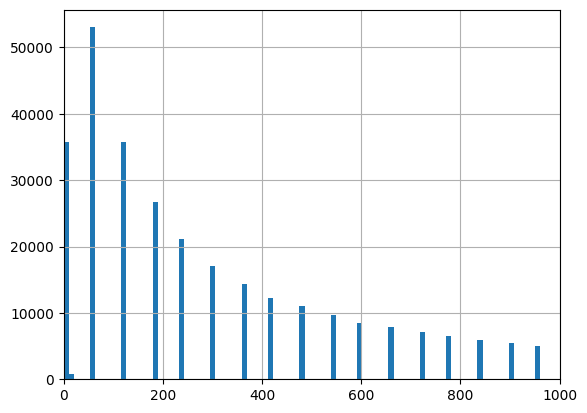

In [ ]:
#3. ¿Cuál es la duración de cada sesión?
visitas['duracion_sesion'] = (visitas['end_ts'] - visitas['start_ts']).dt.seconds #agregamos la columna de la duración de la sesión de cada usuario en segundos

#creación de un histograma para revisar la distribución de los datos
ax = visitas['duracion_sesion'].hist(bins=8000)
ax.set_xlim(0,1000)

print(visitas['duracion_sesion']) #impresión de la columna que se acabó de crear ('duracion_sesion') en el dataframe visitas para observar superficialmente cuál fue el resultado de nuestro cálculo de duración de la sesión.



<Axes: ylabel='duracion_sesion'>

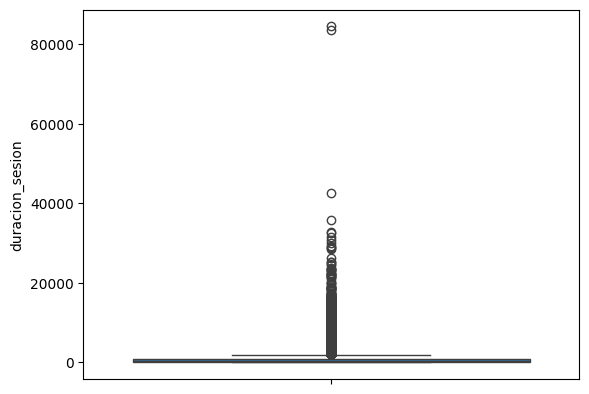

In [ ]:
#Creación de un boxplot para observar de otra forma cómo se distribuyen los datos de la duración de la sesión
sns.boxplot(visitas['duracion_sesion'])

In [ ]:
#impresión de la estadística requerida
print('Duración promedio de las visitas', visitas['duracion_sesion'].mean())
print('Duración de las visitas', visitas['duracion_sesion'].mode().iloc[0])

Duración promedio de las visitas 643.506488592098
Duración de las visitas 60


In [ ]:
#4. ¿Con qué frecuencia los usuarios regresan?
sesiones_por_usuario = visitas.groupby('uid').agg({'start_ts':'min'}).reset_index() #agrupamos a los usuarios por la primera fecha de visita
sesiones_por_usuario.columns=['uid','primera_sesion_ts'] #actualizamos los nombres de las columnas del Data Frame recién creado para darle orden

#creación de las columnas 'dt' necesarias para la creación de cohortes
sesiones_por_usuario['primera_sesion_dt']=sesiones_por_usuario['primera_sesion_ts'].dt.date #transformación de formato de columna primera sesión
sesiones_por_usuario['primera_sesion_mes']=sesiones_por_usuario['primera_sesion_ts'].dt.to_period('M').dt.start_time #creación y formateo de la columna de meses posteriores a la primera visita de cada usuario.

#creación de dataframe visitas a sesiones por usuario para integrar las nuevas columnas creadas.
visitas_completo = visitas.merge(sesiones_por_usuario)

#Creación de cohortes
visitas_completo['cohort_lifetime']=(visitas_completo['mes_visita'].dt.month - visitas_completo['primera_sesion_mes'].dt.month)#metodo uno para calcular el tiempo de vida de la cohorte
visitas_completo['cohort_lifetime']+=(visitas_completo['mes_visita'].dt.year-visitas_completo['primera_sesion_mes'].dt.year)*12


visitas_completo['cohort_lifetime_2']=((visitas_completo['mes_visita']-visitas_completo['primera_sesion_mes']).dt.days)//30 #método dos para calcular el tiempo de vida de la cohorte
visitas_completo.head(50) #visualización superficial del dataframe.

,device,end_ts,source_id,start_ts,uid,mes_visita,semana_visita,dia_visita,duracion_sesion,primera_sesion_ts,primera_sesion_dt,primera_sesion_mes,cohort_lifetime,cohort_lifetime_2
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,0,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-27,2017-12-01,0,0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-01,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-03,2017-09-01,0,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-01,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-29,2017-06-01,7,7
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-01,44,2017-11-05,60,2017-11-05 15:14:00,2017-11-05,2017-11-01,0,0
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-01,29,2017-07-19,180,2017-07-19 10:41:00,2017-07-19,2017-07-01,0,0
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-01,45,2017-11-08,60,2017-11-08 13:42:00,2017-11-08,2017-11-01,0,0


In [ ]:
#Creación tabala dinámica con la que se puede responder el ejercicio

regreso= visitas_completo.pivot_table(
    index='primera_sesion_mes',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='nunique'
)

regreso.fillna('')


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
primera_sesion_mes,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [ ]:
#Calculamos tasa de retorno
regreso_final = regreso.divide(regreso[0], axis=0) * 100
regreso_final.fillna('')
#usuarios cohorte final / usuarios cohorte *100


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
primera_sesion_mes,,,,,,,,,,,,
2017-06-01,100.0,7.866355,5.377479,6.139226,6.855721,7.142318,6.101516,5.777208,5.234181,5.08334,4.065163,4.49506
2017-07-01,100.0,5.608828,5.129376,5.616438,5.821918,4.817352,4.535769,4.57382,3.881279,2.861492,2.747336,
2017-08-01,100.0,7.690797,6.286219,6.276397,5.009331,4.400354,3.634221,3.948532,2.78951,2.602888,,
2017-09-01,100.0,8.548851,6.920498,5.070642,3.939176,3.783525,3.585967,2.418582,2.280891,,,
2017-10-01,100.0,7.8608,5.223852,3.895754,3.426108,3.222081,2.136505,2.036417,,,,
2017-11-01,100.0,7.828097,4.411333,3.868174,3.372725,2.341456,2.179977,,,,,
2017-12-01,100.0,5.58018,3.799272,3.110654,2.026278,1.903593,,,,,,
2018-01-01,100.0,5.971535,3.933876,2.497348,2.024399,,,,,,,
2018-02-01,100.0,5.707979,2.545389,2.009281,,,,,,,,


Todo parece indicar que en promedio 23.228 personas usan el servicio por mes, 3797 lo hacen por semana y 907 por día. En contraste con esta información, por día se pueden abrir 987 sesiones y su duración en promedio es de 643 segundos, aunque según se observa en el histograma la duración puede oscilar entre 0 segundos y 60 segundos, la moda de este indicador es 60 segundos. Aunque los números varían de mes a mes, se puede concluir que posterior a la primer visita, dificilmente más del 90% del tráfico vuelve.

Hay que tener en cuenta que por algún motivo hay datos muy sesgados en este DataFrame, contrario a "la normalidad" de las cifras donde rara vez se vuelve a usar el servicio y los usuarios se demoran poco, lo que vemos al ver el número de sesiones por usuario es que en el 'top head' de este dataset hay usuarios con más de mil visitas. Definitivamente hay algo raro, quizá usuarios con dificultad para usar la plataforma o que después de un tiempo vuelven a consultar para un evento que sucede regularmente.  

# 2. Ventas:

*   ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
*   ¿Cuántos pedidos hacen durante un período de tiempo dado?
*   ¿Cuál es el tamaño promedio de compra?
*   ¿Cuánto dinero traen? (LTV)

Promedio general de tiempe que pasa un usuario antes de hacer la compra: 17 days, 14:40:09.997025
Tiempo estimado que pasa un usuario desde que entra a la página hasta que realiza una compra: 0:00:00


,tiempo_user_to_buy
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
50410,0.0
50411,0.0
50412,0.0
50413,220.0


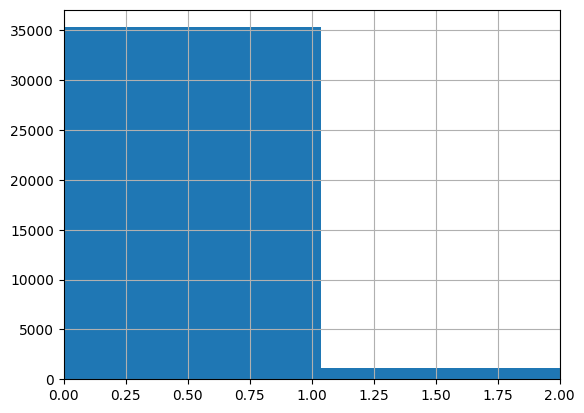

In [ ]:
#1. ¿Cuándo empieza la gente a comprar?

orders['mes_compra']= orders['buy_ts'].dt.to_period('M').dt.start_time #creación de columna de mes de compra, donde se extrae el mes de la fecha en la columna 'buy_ts'
orders['semana_compra']= orders['buy_ts'].dt.isocalendar().week #creación de columna de semana de la compra, donde se extrae el número de la semana del año de la fecha en la columna 'buy_ts'
orders['dia_compra']= orders['buy_ts'].dt.date #creación de columna de día de la compra, donde se extrae el día de la fecha en la columna 'buy_ts'
primera_compra= orders.groupby('uid').agg({'buy_ts':'min'}).reset_index() #calculamos la primer compra de los usuarios
primera_compra.columns =['uid', 'primer_dia_de_compra']

#creación de las columnas 'dt' necesarias para la creación de cohortes
primera_compra['primer_dia_de_compra_dt']=primera_compra['primer_dia_de_compra'].dt.date #transformación de formato de columna primera compra
primera_compra['mes_primera_compra_dt']=primera_compra['primer_dia_de_compra'].dt.to_period('M').dt.start_time #creación y formateo de la columna de meses posteriores a la primera compra de cada usuario.
orders_con_primera_compra = orders.merge(primera_compra) # unión de dataframe con nuevas columnas procesadas con su dataframe original orders
primera_visita = visitas_completo[visitas_completo['start_ts'] == visitas_completo['primera_sesion_ts']].reset_index()
new_orders = primera_visita.merge(orders_con_primera_compra, on='uid',how='right') #unión de dataframes de compras con datos listos y dataframe de visitas, filtrado por las primeras visitas. Se filtra solo por las coincidencias de uid de la tabla de ventas.
new_orders=new_orders.drop(['index','cohort_lifetime_2'], axis='columns') #borramos lac olumna 'index' que se conserva del dataframe filtrado visitas_completo, del que se extrajo solo las filas que correspondieran a la primer visita


# calcular la diferencia entre la fecha de compra y la visita
new_orders['tiempo_user_to_buy'] = new_orders['primer_dia_de_compra_dt'] - new_orders['primera_sesion_dt']
promedio__inicio_tiempo_de_compra= new_orders['tiempo_user_to_buy'].sum()/new_orders['tiempo_user_to_buy'].count()
moda__inicio_tiempo_de_compra= statistics.mode(new_orders['tiempo_user_to_buy'])

print('Promedio general de tiempe que pasa un usuario antes de hacer la compra:', promedio__inicio_tiempo_de_compra)
print('Tiempo estimado que pasa un usuario desde que entra a la página hasta que realiza una compra:', moda__inicio_tiempo_de_compra)

nuevo = new_orders['tiempo_user_to_buy']/np.timedelta64(1,'D')
bx = nuevo.hist(bins = 350)
bx.set_xlim(0,2)
nuevo

In [ ]:
#2. ¿Cuántos pedidos hacen durante un período de tiempo dado?
#3. #¿Cuál es el tamaño promedio de compra?

#Creación de cohortes para realizar análisis por cohorte
new_orders['orders_cohort_lifetime']=((new_orders['mes_compra']-new_orders['mes_primera_compra_dt']).dt.days)//30 #método dos para calcular el tiempo de vida de la cohorte

#Cálculos generales
compras_por_usuario = new_orders.groupby(['uid','dia_compra'])['mes_compra'].count().reset_index()
compras_por_usuario.columns= ['uid','dia_compra','numero_compras']
compras_por_usuario['mes_compra'] = pd.to_datetime(compras_por_usuario['dia_compra']).dt.month
compras_promedio_usuario= compras_por_usuario.groupby('mes_compra')['numero_compras'].mean()
número_total_de_pedidos =compras_por_usuario.groupby('mes_compra')['numero_compras'].count()

#Impresión de métricas generales
print('Métricas generales:')
print(f'En promedio, los usuarios realizaron {compras_por_usuario['numero_compras'].mean()} a lo largo de una vida de 12 meses, el promedio de volumen de compra mensual fue {número_total_de_pedidos.mean().astype(int)}')
número_total_de_pedidos

Métricas generales:
En promedio, los usuarios realizaron 1.0830755349316834 a lo largo de una vida de 12 meses, el promedio de volumen de compra mensual fue 3879


,numero_compras
mes_compra,
1,4398
2,4863
3,4803
4,3087
5,4027
6,2188
7,2188
8,1666
9,3141


In [ ]:
#Análisis por cohortes del comportamiento de compras de los usuarios

pedidos_x_cohorte= new_orders.pivot_table(index='mes_primera_compra_dt',columns='orders_cohort_lifetime',values='mes_compra',aggfunc='count') #Creación de tabla dinámica  de volumen de pedido por cohorte
pedidos_x_cohorte.fillna('')

orders_cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra_dt,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,,
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,,,
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,,,,
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,,,,,
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,,,,,,
2018-01-01,3783.0,383.0,,64.0,78.0,,,,,,,
2018-02-01,4317.0,83.0,70.0,,,,,,,,,


In [ ]:
promedio_pedidos_x_cohorte = pedidos_x_cohorte.divide(pedidos_x_cohorte[0], axis=0) * 100
promedio_pedidos_x_cohorte.fillna('')
#usuarios cohorte final / usuarios cohorte *100

orders_cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra_dt,,,,,,,,,,,,
2017-06-01,100.0,7.519116,7.391674,9.60068,12.404418,9.260833,11.724724,7.391674,9.005947,6.499575,4.078165,3.653356
2017-07-01,100.0,4.574565,5.489478,4.757548,3.293687,3.751144,2.790485,2.287283,2.653248,1.097896,2.42452,
2017-08-01,100.0,7.04501,6.523157,5.283757,5.544684,4.044357,3.196347,5.088063,3.000652,3.000652,,
2017-09-01,100.0,7.466758,5.48926,5.591544,2.28435,3.716331,3.682237,1.909308,2.079782,,,
2017-10-01,100.0,6.325544,3.263497,2.457695,2.598711,2.07494,1.732474,2.518131,,,,
2017-11-01,100.0,8.248494,3.781425,4.38396,2.82568,1.225847,2.11926,,,,,
2017-12-01,100.0,5.344418,3.998416,3.543151,1.702296,2.078385,,,,,,
2018-01-01,100.0,10.12424,,1.691779,2.061856,,,,,,,
2018-02-01,100.0,1.922631,1.621496,,,,,,,,,


In [ ]:
#análisis de compras promedio por usuario de cohorte
compras_por_usuario_1 = new_orders.groupby(['uid','dia_compra'])['revenue'].count().reset_index()
compras_por_usuario_1.columns= ['uid','dia_compra','numero_compras']
compras_por_usuario_cohorte = new_orders.merge(compras_por_usuario_1)


pedidos_x_usuario_x_cohorte= compras_por_usuario_cohorte.pivot_table(index='mes_primera_compra_dt',columns='orders_cohort_lifetime',values='numero_compras',aggfunc='mean') #Creación de tabla dinámica  de volumen de pedido por cohorte
pedidos_x_usuario_x_cohorte.fillna('')


orders_cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra_dt,,,,,,,,,,,,
2017-06-01,1.158029,1.621469,1.977011,1.80531,1.842466,1.440367,1.652174,1.54023,1.698113,1.457516,1.125,1.116279
2017-07-01,1.142726,1.3,1.55,1.269231,1.138889,2.04878,1.622951,1.04,1.241379,1.0,1.339623,
2017-08-01,1.117417,1.518519,1.44,1.493827,1.305882,1.258065,1.489796,1.487179,1.391304,1.217391,,
2017-09-01,1.124787,1.392694,1.186335,1.695122,1.119403,1.311927,1.314815,1.214286,1.196721,,,
2017-10-01,1.116841,1.324841,1.123457,1.131148,1.217054,1.174757,1.255814,1.48,,,,
2017-11-01,1.165385,1.392947,1.21978,1.625592,1.441176,1.067797,1.54902,,,,,
2017-12-01,1.142122,1.511111,1.594059,1.625698,1.255814,1.304762,,,,,,
2018-01-01,1.117367,1.762402,,1.15625,1.512821,,,,,,,
2018-02-01,1.121381,1.192771,1.428571,,,,,,,,,


In [ ]:
#¿Cuánto dinero traen? (LTV)
compras_por_usuario_cohorte['mes_primera_compra_ts'] = compras_por_usuario_cohorte['primer_dia_de_compra'].dt.to_period('M') #creamos una columna con el formato adecuado para el cálculo requerido
compras_por_usuario_cohorte['mes_compra_ts'] = compras_por_usuario_cohorte['mes_compra'].dt.to_period('M') #creamos una columna con el formato adecuado para el cálculo requerido
#calculamos el tamaño de las cohortes o en otras palabras el número de usuarios por cada fragmento de tiempo
cohort_sizes= compras_por_usuario_cohorte.groupby('mes_primera_compra_ts').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns=['mes_primera_compra_ts','tamaño_cohorte']
#calculamos ingresos por usuario
ingreso_por_usuario= compras_por_usuario_cohorte.groupby(['mes_primera_compra_ts','mes_compra_ts']).agg({'revenue':'sum'}).reset_index()
report= pd.merge(cohort_sizes,ingreso_por_usuario, on='mes_primera_compra_ts') #unimos DataFrame de tamaño de cohortes y ingresos

report['ltv']=report['revenue']/report['tamaño_cohorte'] #calculamos life time value
report['age']=(report['mes_compra_ts']-report['mes_primera_compra_ts']).apply(lambda x:x.n) #calculamos cohortes
report['age']=report['age'].round().astype('int')
report

,mes_primera_compra_ts,tamaño_cohorte,mes_compra_ts,revenue,ltv,age
0,2017-06,2023,2017-06,9557.49,4.724414,0
1,2017-06,2023,2017-07,981.82,0.485329,1
2,2017-06,2023,2017-08,885.34,0.437637,2
3,2017-06,2023,2017-09,1931.30,0.954671,3
4,2017-06,2023,2017-10,2068.58,1.022531,4
...,...,...,...,...,...,...
74,2018-03,3533,2018-05,1114.87,0.315559,2
75,2018-04,2276,2018-04,10600.69,4.657597,0
76,2018-04,2276,2018-05,1209.92,0.531599,1
77,2018-05,2988,2018-05,13925.76,4.660562,0


In [ ]:
output_promedio=report.pivot_table(index='mes_primera_compra_ts',columns='age',values='ltv',aggfunc='mean')
output_promedio.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra_ts,,,,,,,,,,,,
2017-06,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.95044,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.14182,0.161232,0.147145,0.155673,
2017-08,5.276518,0.471993,0.458482,0.391277,0.494051,0.28354,0.210664,0.405007,0.292212,0.187978,,
2017-09,5.644529,1.117586,0.52093,3.975792,0.400558,0.647067,0.701608,0.24315,0.184006,,,
2017-10,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.084816,0.11547,,,,
2017-11,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,,,,,
2017-12,4.738191,0.260374,0.925097,1.065275,0.31293,0.338047,,,,,,
2018-01,4.135636,0.294758,0.304281,0.142778,0.062698,,,,,,,
2018-02,4.156987,0.278274,0.078515,0.074144,,,,,,,,


In [ ]:
total_ingresos_promedio_x_usuario_x_cohorte = output_promedio.sum(axis=1)
total_ingresos_promedio_x_usuario_x_cohorte

,0
mes_primera_compra_ts,
2017-06,11.879234
2017-07,8.386854
2017-08,8.471723
2017-09,13.435227
2017-10,6.360242
2017-11,6.395244
2017-12,7.639913
2018-01,4.940151
2018-02,4.587921


In [ ]:
output =report.pivot_table(index='mes_primera_compra_ts',columns='age',values='revenue',aggfunc='mean')
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra_ts,,,,,,,,,,,,
2017-06,9557.49,981.82,885.34,1931.3,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,
2017-08,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,,
2017-09,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,,,
2017-10,21716.20,2325.21,830.65,682.01,657.77,522.37,368.1,501.14,,,,
2017-11,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,,,,,
2017-12,20767.49,1141.22,4054.7,4669.1,1371.57,1481.66,,,,,,
2018-01,13949.50,994.22,1026.34,481.59,211.48,,,,,,,
2018-02,15177.16,1015.98,286.66,270.7,,,,,,,,


In [ ]:
total_ingresos_promedio_x_cohorte = output.sum(axis=1)
total_ingresos_promedio_x_cohorte

,0
mes_primera_compra_ts,
2017-06,24031.69
2017-07,16127.92
2017-08,11606.26
2017-09,34676.32
2017-10,27603.45
2017-11,26098.99
2017-12,33485.74
2018-01,16663.13
2018-02,16750.50


Es claro que las personas empiezan a comprar  casi inmeditamente, en más del 50% de los casos se demoran entre menos de un día y un día. Además pordemos observar que el volumen de compras disminuye considerablemente más del 90% Es decir que quien hoy hizo una compra, dificilmente vuelve a hacerla en los meses próximos.

En cuánto a la cantidad de compras, la mayoría de personas realiza una máximo dos compras.

De acuerdo con el comportamiento enunciado anteriormente, el ingreso más fuerte grande de cada cohorte proviene de su primera compra. En la corte más madura el recaudo por usuario es de 11 dólares a lo largo de su vida. De las 13 cohortes 7 están por debajo de los 20.000 dólares de recaudación durante toda su existencia. Hay que evaluar en profundidad el comportamiento de las cohortes con mayor recaudación ya que superan la cohorte  más madura en el tiempo ¿Qué pudo influir en el aumento considerable de su ltv?

# 3. Marketing:

*  ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)
* ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
* ¿Cuán rentables eran las inversiones? (ROMI)

In [ ]:
#1. ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
costs['mes_inversión'] = costs['dt'].dt.to_period('M')
gasto_x_funte_de_adquisicion_x_tiempo= costs.pivot_table(index='mes_inversión',columns='source_id',values='costs',aggfunc='sum',margins=True, margins_name='Total')
gasto_por_fecha =gasto_x_funte_de_adquisicion_x_tiempo.sum(axis=0)

gasto_x_funte_de_adquisicion_x_tiempo

source_id,1,2,3,4,5,9,10,Total
mes_inversión,,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,18015.00
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,18240.59
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,14790.54
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,24368.91
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,36322.88
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,37907.88
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,38315.35
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,33518.52
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,32723.03


In [ ]:
#creación de dataframes para análisis gráfico
gasto_x_funte_de_adquisicion_x_tiempo_1=gasto_x_funte_de_adquisicion_x_tiempo.reset_index() #convierto en DataFrame la tabla dinámica hecha anteriormente.

#Limpio el DataFrame nuevo
#gasto_x_funte_de_adquisicion_x_tiempo_1 Data Frame para establecer relación tiempo inversión
gasto_x_funte_de_adquisicion_x_tiempo_1 = gasto_x_funte_de_adquisicion_x_tiempo_1.drop(12, axis= 0)#Quito fila total por fuente
gasto_x_funte_de_adquisicion_x_tiempo_1['mes_inversión']=gasto_x_funte_de_adquisicion_x_tiempo_1['mes_inversión'].astype('object')
gasto_x_funte_de_adquisicion_x_tiempo_1

gasto_x_funte_de_adquisicion_x_tiempo_2=gasto_x_funte_de_adquisicion_x_tiempo
gasto_x_funte_de_adquisicion_x_tiempo_2 = gasto_x_funte_de_adquisicion_x_tiempo_2.drop('Total', axis= 1)#Quito columna total por cohortes


/tmp/ipython-input-2931183790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(gasto_x_funte_de_adquisicion_x_tiempo_1, x='mes_inversión', y='Total',palette="vlag")


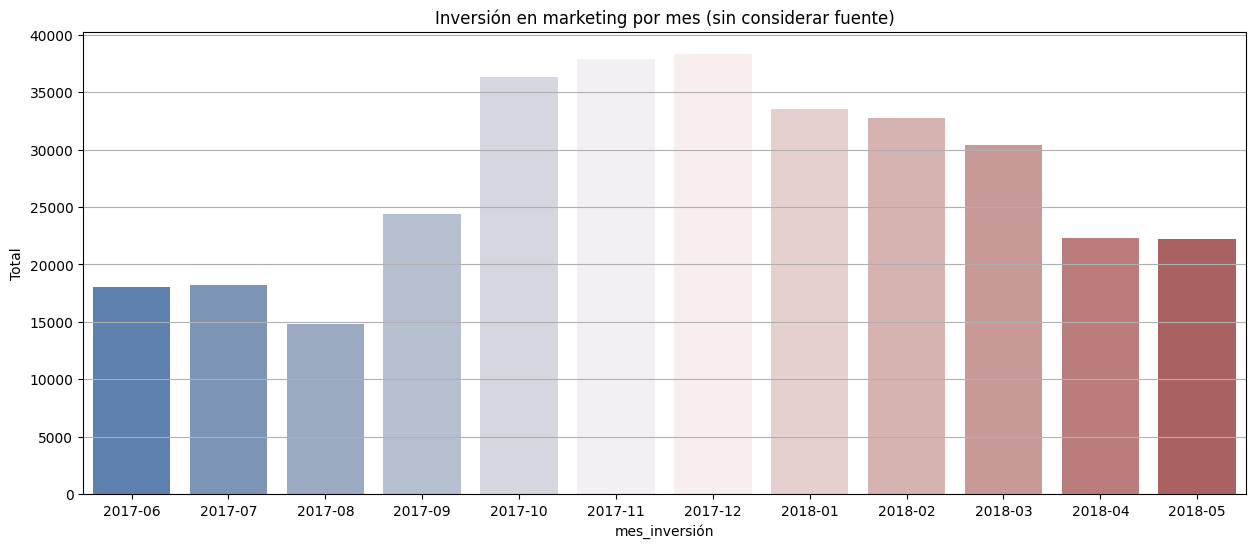

In [ ]:
#gráfica de inversión total por mes sin considerar fuente
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(gasto_x_funte_de_adquisicion_x_tiempo_1, x='mes_inversión', y='Total',palette="vlag")
plt.title('Inversión en marketing por mes (sin considerar fuente)')
plt.show()

/tmp/ipython-input-2098523701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(inversion_fuente ,palette="vlag")


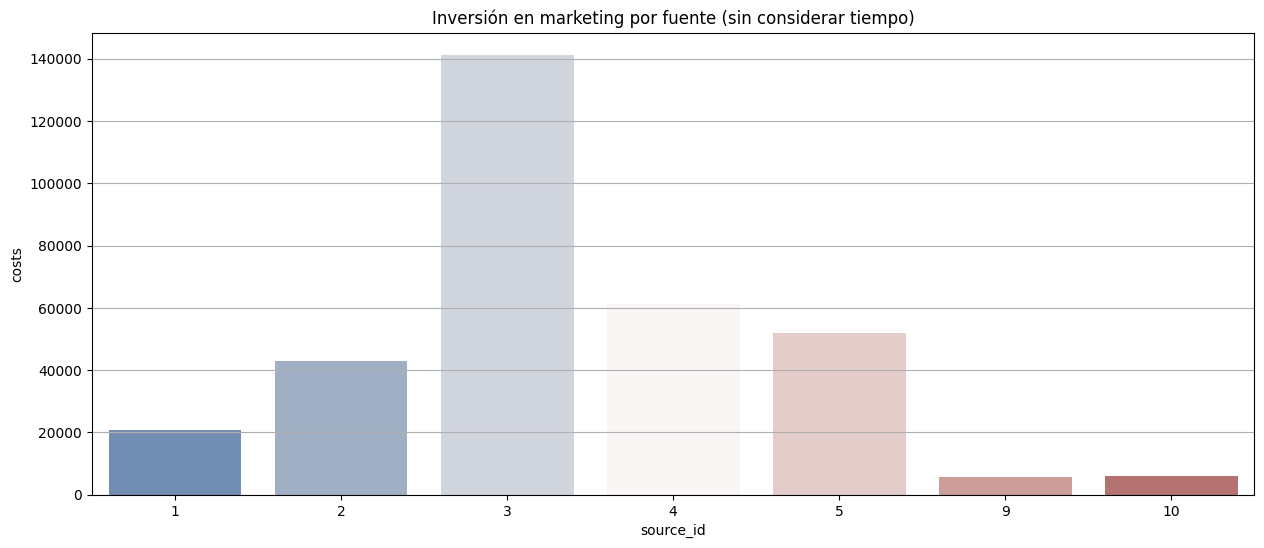

In [ ]:
#gráfica de inversión total por fuente
inversion_fuente = costs.groupby('source_id')['costs'].sum()
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(inversion_fuente ,palette="vlag")
plt.title('Inversión en marketing por fuente (sin considerar tiempo)')
plt.show()

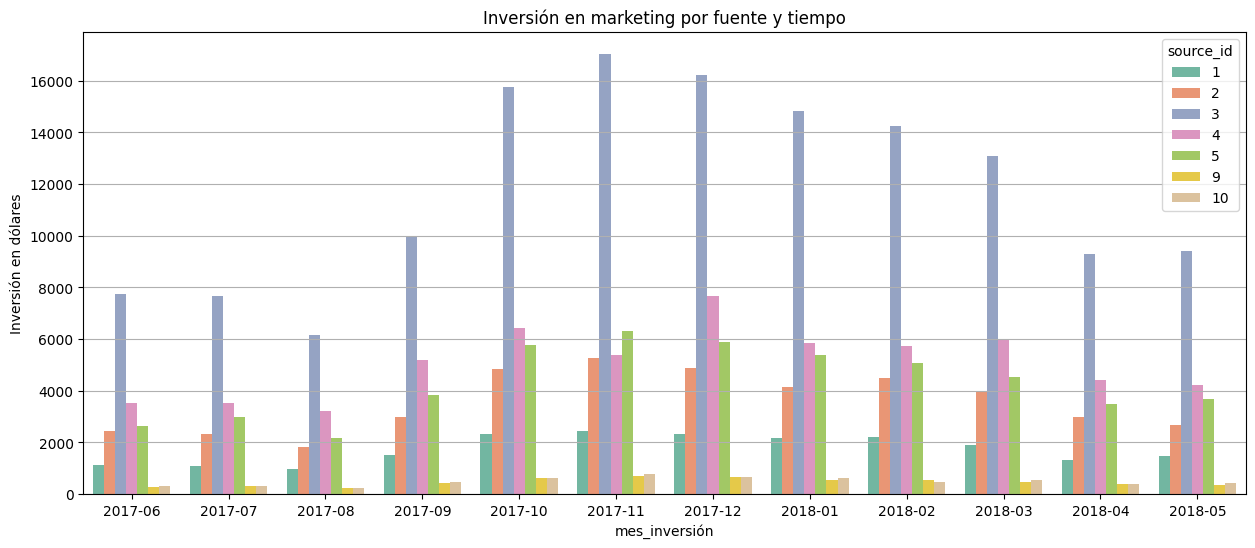

In [ ]:
#gráfica de inversión total por fuente y tiempo
tabla_grafico_tiempo_fuente = costs.groupby(['mes_inversión','source_id'])['costs'].sum().reset_index()
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(data=tabla_grafico_tiempo_fuente, x='mes_inversión', y='costs', hue='source_id', palette='Set2')
plt.title('Inversión en marketing por fuente y tiempo')
plt.ylabel('Inversión en dólares')
plt.show()

In [ ]:
#2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
#cac=costos/número de compradores
compras_mas_gastos = report.merge(tabla_grafico_tiempo_fuente, left_on ='mes_primera_compra_ts',right_on = 'mes_inversión')
compras_mas_gastos['cac']=compras_mas_gastos['costs']/compras_mas_gastos['tamaño_cohorte']
compras_mas_gastos

,mes_primera_compra_ts,tamaño_cohorte,mes_compra_ts,revenue,ltv,age,mes_inversión,source_id,costs,cac
0,2017-06,2023,2017-06,9557.49,4.724414,0,2017-06,1,1125.61,0.556406
1,2017-06,2023,2017-06,9557.49,4.724414,0,2017-06,2,2427.38,1.199891
2,2017-06,2023,2017-06,9557.49,4.724414,0,2017-06,3,7731.65,3.821873
3,2017-06,2023,2017-06,9557.49,4.724414,0,2017-06,4,3514.80,1.737420
4,2017-06,2023,2017-06,9557.49,4.724414,0,2017-06,5,2616.12,1.293188
...,...,...,...,...,...,...,...,...,...,...
541,2018-05,2988,2018-05,13925.76,4.660562,0,2018-05,3,9411.42,3.149739
542,2018-05,2988,2018-05,13925.76,4.660562,0,2018-05,4,4214.21,1.410378
543,2018-05,2988,2018-05,13925.76,4.660562,0,2018-05,5,3669.56,1.228099
544,2018-05,2988,2018-05,13925.76,4.660562,0,2018-05,9,362.17,0.121208


In [ ]:
cac = compras_mas_gastos.groupby(['mes_primera_compra_ts','age','source_id'])['cac'].sum().reset_index()
cac

,mes_primera_compra_ts,age,source_id,cac
0,2017-06,0,1,0.556406
1,2017-06,0,2,1.199891
2,2017-06,0,3,3.821873
3,2017-06,0,4,1.737420
4,2017-06,0,5,1.293188
...,...,...,...,...
541,2018-05,0,3,3.149739
542,2018-05,0,4,1.410378
543,2018-05,0,5,1.228099
544,2018-05,0,9,0.121208


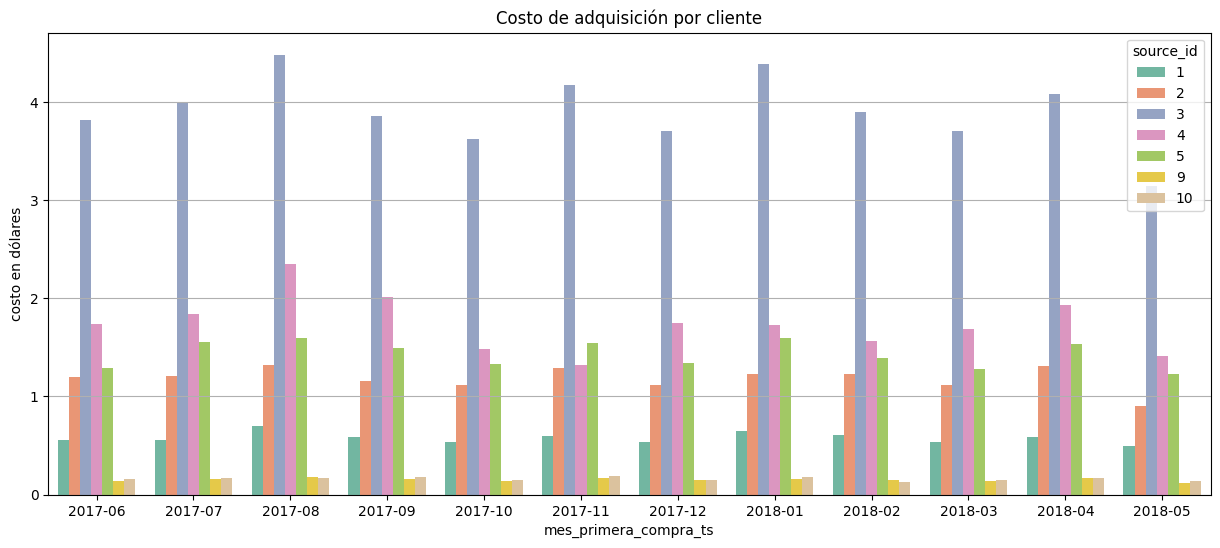

In [ ]:
#Gráfico ¿Cuánto vale cada cliente?
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(data=cac, x='mes_primera_compra_ts', y='cac', hue='source_id', palette='Set2')
plt.title('Costo de adquisición por cliente')
plt.ylabel('costo en dólares')
plt.show()

In [ ]:
#3.¿Cuán rentables eran las inversiones? (ROMI)

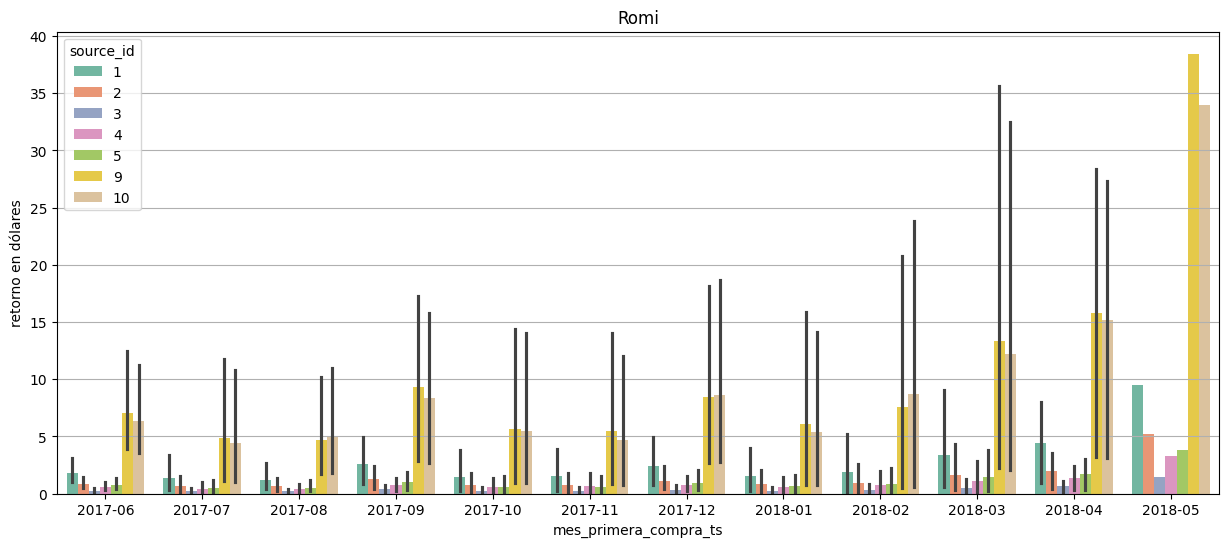

In [ ]:
compras_mas_gastos['romi']=compras_mas_gastos['ltv']/compras_mas_gastos['cac']
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(data=compras_mas_gastos, x='mes_primera_compra_ts', y='romi', hue='source_id', palette='Set2')
plt.title('Romi')
plt.ylabel('retorno en dólares')
plt.show()

No se calculan indicadores para las fuentes 6,7 y 8, puesto que al parecer no se utilizaron para esta campaña. A la fuente número 3 fue a la que más se le invirtió en toda la campaña, con un total de 141.321 dólares. A la que menos se le invirtió fue a la 9 con 5.517 dólares en total.

Los meses entre 2017-09 y 2018-03 (7 meses) fueron los que más inversión en marketing tuvieron, sin embargo la fuerza se hizo de nuevo en la fuente número 3 y no en las demás.

Las fuentes 2, 4 y 5 fueron las que le siguieron a la número 3 pero no de forma consecutiva, un mes se le invertía más a una y las otras bajaban en inversión. Es decir que la única con una inversión intensiva fue la número 3.

Sin embargo, esas no son las fuentes que más Romi están dejando. Parece que las fuestes que mayor retorno de inversión están dejando son la 9 y 10, justo a las que menos se les invierte.

In [ ]:
# consideraciones previas (compras por fuente)
new_orders.pivot_table(index='mes_primera_compra_dt',columns=['orders_cohort_lifetime', 'source_id'],values='revenue',aggfunc='sum').fillna('')


orders_cohort_lifetime       0                                             \
source_id                    1        2        3        4        5     7    
mes_primera_compra_dt                                                       
2017-06-01               1378.7  1043.68  2804.34  1959.84  1898.89         
2017-07-01               1166.7  1753.37  3125.82  2866.63  2236.21         
2017-08-01               846.75   705.88   1711.5  1711.96  1818.05  1.22   
2017-09-01              1365.34  1830.37  4344.78  2812.34  3649.72         
2017-10-01              2046.33  3039.84   5514.4  5119.23  4811.06         
2017-11-01              2394.65  2781.76  5511.45  6054.24  3160.35         
2017-12-01               1517.4  3356.22  5503.54  5744.81  3860.36         
2018-01-01              1372.98  1268.25   4139.1  3902.66  2754.66         
2018-02-01              1563.76  1776.88  4474.36  4649.10  2992.71         
2018-03-01              2625.41  1778.57   4155.5  4938.60  2536.26         
2018-04-01               842.12  1212.33  2805.85  3457.28  1802.58         
2018-05-01              1258.19  2820.14  3256.54  3802.91  2094.04         
2018-06-01                                            3.42                  

orders_cohort_lifetime                      1                            \
source_id                   9       10      1        2       3       4    
mes_primera_compra_dt                                                     
2017-06-01              242.69  229.35  414.98   115.54   71.97   16.66   
2017-07-01              232.39  176.53  175.31   159.24  134.54   30.55   
2017-08-01              248.57   184.9  135.29   115.12   52.16   57.01   
2017-09-01              373.85  192.13  409.01  1796.39   193.5  283.59   
2017-10-01              638.03  547.31  358.98   972.53  526.36  171.06   
2017-11-01              542.22  591.59  185.91    361.6  163.93  762.05   
2017-12-01              462.93  322.23  102.95   587.67  173.66  122.99   
2018-01-01              226.74  285.11   55.94   825.57  316.09  210.03   
2018-02-01               417.8  318.53   18.52    94.69   96.31   38.93   
2018-03-01              422.71  638.44  544.81   258.87  112.88   98.91   
2018-04-01               218.6  261.93   48.24    97.02  875.44  134.58   
2018-05-01              223.05  470.89                                    
2018-06-01                                                                

orders_cohort_lifetime                            2                            \
source_id                   5      9      10      1        2       3       4    
mes_primera_compra_dt                                                           
2017-06-01              346.73   4.88  11.06  419.43     63.9  118.93   70.57   
2017-07-01              135.16   8.22   1.59  856.74    12.34   63.38    41.6   
2017-08-01               270.8   12.1   4.15  114.16    21.93   97.04   44.25   
2017-09-01              107.47  88.97   5.56  126.96    522.1  253.42  184.95   
2017-10-01              210.78  68.08  17.42   83.22   261.66  137.17  177.47   
2017-11-01              129.76  19.31   6.71   312.2   174.17   102.4  118.31   
2017-12-01              104.34   38.0  11.61   95.58  3555.13  187.16  126.59   
2018-01-01              571.54  33.57   7.82                                    
2018-02-01               31.34   6.38   0.49  101.62     74.9   67.02   20.47   
2018-03-01               22.83  12.04  12.71  221.64   419.05   331.6   96.44   
2018-04-01               30.81  23.83                                           
2018-05-01                                                                      
2018-06-01                                                                      

orders_cohort_lifetime                            3                            \
source_id                   5      9      10      1        2       3       4    
mes_primera_compra_dt                                                           
2017-06-01              17

In [39]:
# Consideraciones previas (tráfico por fuente)
new_orders.pivot_table(index='mes_primera_compra_dt',columns=['orders_cohort_lifetime', 'source_id'],values='uid',aggfunc='nunique').fillna('')

orders_cohort_lifetime     0                                             \
source_id                  1      2       3       4      5    7      9    
mes_primera_compra_dt                                                     
2017-06-01              190.0  235.0   638.0   413.0  384.0        68.0   
2017-07-01              160.0  208.0   512.0   517.0  423.0        52.0   
2017-08-01              113.0  123.0   337.0   338.0  360.0  1.0   61.0   
2017-09-01              227.0  221.0   781.0   590.0  589.0        87.0   
2017-10-01              340.0  396.0  1152.0  1172.0  945.0       126.0   
2017-11-01              324.0  398.0  1216.0  1177.0  693.0       145.0   
2017-12-01              331.0  381.0  1317.0  1377.0  771.0       121.0   
2018-01-01              238.0  292.0  1006.0  1032.0  633.0        80.0   
2018-02-01              275.0  293.0  1092.0  1106.0  678.0        84.0   
2018-03-01              281.0  337.0   959.0  1081.0  528.0       161.0   
2018-04-01              179.0  210.0   619.0   688.0  430.0        43.0   
2018-05-01              241.0  412.0   844.0   804.0  497.0        60.0   
2018-06-01                                       1.0                      

orders_cohort_lifetime           1                                        2   \
source_id                  10    1     2     3     4     5     9    10    1    
mes_primera_compra_dt                                                          
2017-06-01               95.0  16.0   8.0  13.0   7.0  14.0   1.0  2.0  10.0   
2017-07-01               51.0   5.0   8.0  17.0   8.0   7.0   5.0  2.0   9.0   
2017-08-01               37.0  10.0  10.0  11.0  11.0  12.0   2.0  2.0   4.0   
2017-09-01               86.0  15.0  22.0  38.0  25.0  16.0  12.0  2.0  13.0   
2017-10-01              209.0  19.0  37.0  49.0  43.0  37.0  18.0  3.0   9.0   
2017-11-01              128.0  17.0  25.0  59.0  79.0  31.0   6.0  5.0  14.0   
2017-12-01               85.0  13.0  21.0  38.0  35.0  30.0   8.0  1.0   9.0   
2018-01-01               92.0   9.0  28.0  56.0  45.0  32.0  10.0  3.0         
2018-02-01              123.0   4.0   9.0  18.0  17.0   7.0   2.0  1.0   7.0   
2018-03-01              186.0  10.0  14.0  25.0  22.0   7.0   7.0  5.0  10.0   
2018-04-01              107.0   6.0   8.0  16.0  26.0  10.0   3.0              
2018-05-01              130.0                                                  
2018-06-01                                                                     

orders_cohort_lifetime                                       3               \
source_id                 2     3     4     5     9    10    1     2     3    
mes_primera_compra_dt                                                         
2017-06-01               8.0  14.0   8.0   7.0   3.0        9.0  14.0   9.0   
2017-07-01               7.0  16.0   8.0   9.0   8.0        5.0  15.0  16.0   
2017-08-01               8.0   8.0   9.0  12.0  10.0  2.0   5.0   4.0   6.0   
2017-09-01              23.0  24.0  16.0  14.0   6.0  4.0  10.0  13.0  14.0   
2017-10-01              18.0  33.0  35.0  18.0   8.0  2.0   5.0  15.0  16.0   
2017-11-01              11.0  35.0  37.0  15.0   7.0  1.0  12.0   9.0  26.0   
2017-12-01              14.0  25.0  30.0  19.0   6.0       12.0  15.0  27.0   
2018-01-01                                                  5.0   6.0  14.0   
2018-02-01               7.0  13.0   8.0   4.0                                
2018-03-01               8.0  10.0  14.0   9.0   4.0  3.0                     
2018-04-01                                                                    
2018-05-01                                                                    
2018-06-01                                                                    

orders_cohort_lifetime                          4                           \
source_id                 4     5    9    10    1     2     3     4     5    
mes_primera_compra_dt                                                        
2017-06-01         

# Conclusiones
*  Teniendo en cuenta el estudio del comportamiento de nuestras cohortes vemos que el tráfico traído por las plataformas 2, 3 y 4 es alto, sin embargo es un esfuerzo muy alto considerando el retorno de inversión. Plataformas como la 9 y 10 han tenido menor inversión, por consiguiente menor tráfico ignorando que el retorno de inversión por esas fuentes es más del doble, casi que por cada 25 centavos invertido están entregando 6 dólares de romi. Hay que mantener  la inversión en las demás plataformas, pero hay que hacer un gasto más eficiente del recurso. considerando adquirir mayor tráfico y número de ventas en razón de la inversión tan costosa que se hace en el caso de fuentes como la 3. No es aconsejable salirse de una fuente, hay que replantear la estrategia de comunicación y tratar de disminuir costos para tener presencia en todos los canales con mayor retorno de inversión.

* La conclusión es clara. 9 y 10 son las plataformas que asegurarán el exito financiero de esta compañía. Allí se debe aumentar la inversión, por ahora con el mismo mensaje.

*  Se recomienda revisar por qué no se están usando las fuentes 6, 7 y 8. Quizá esa es una buena opción pero no se puede evaluar si no hay datos para ellas, lo que quiere decir que ni siquiera se ha planteado o están muertos esos canales.

- -   Estas concluciones se basan en el análisis profundo de todas los archivos.
  -Sin consideramos el gráfico 'Inversión en marketing por mes (sin considerar fuente)', 'Inversión en marketing por fuente (sin considerar tiempo)' y 'Inversión en marketing por fuente y tiempo'. Nos daremos cuenta que hay unos meses y unos canales con mayor impulso, lo que quiere decir que aunque hay eventos todo el año, solo se hace enfoque en un periodo particular. Y aunque hay clientes potenciales en todas las fuentes y mejores tasas de retorno en otros espacios se impulsa intensivamente un solo espacio.
  -Además al observar el gráfico de costo de adquisición por cliente se puede apreciar que esa fuente en la que se invierte más, aunque presenta un volumen de tráfico y de ventas atractivo (como se ve en las dos últimas tablas), tiene un costo muy alto y un retorno de inversión muy bajo, como se aprecia en el gráfico Romi.


- Como una consideración adicional, es importante considerar un plan de fidelización de clientes. El 90% se va después de la primera compra.